In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Replace 'EMNIST' with your folder name if different
mat_file_path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/EMNIST/emnist-byclass.mat'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import string

In [ ]:
emnist_data = sio.loadmat(mat_file_path)

In [ ]:
# Extract training images and labels
X_train = emnist_data['dataset'][0][0][0][0][0][0]
y_train = emnist_data['dataset'][0][0][0][0][0][1]

# Extract testing images and labels
X_test = emnist_data['dataset'][0][0][1][0][0][0]
y_test = emnist_data['dataset'][0][0][1][0][0][1]

# Print the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (697932, 784)
y_train shape: (697932, 1)
X_test shape: (116323, 784)
y_test shape: (116323, 1)


In [ ]:
# Reshape images to (num_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Transpose the images
X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))

# Flip the images horizontally
X_train = np.flip(X_train, axis=2)
X_test = np.flip(X_test, axis=2)

In [ ]:
# Reshape to (num_samples, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Flatten labels and convert to integers
y_train = y_train.flatten().astype(np.int64)
y_test = y_test.flatten().astype(np.int64)


In [ ]:
# Get the number of classes
num_classes = len(np.unique(y_train))
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
# Create label mapping for EMNIST ByClass dataset
emnist_labels = {}

# Digits 0-9
for i in range(10):
    emnist_labels[i] = str(i)

# Uppercase letters 10-35
uppercase_letters = list(string.ascii_uppercase)
for i in range(10, 36):
    emnist_labels[i] = uppercase_letters[i - 10]

# Lowercase letters 36-61
lowercase_letters = list(string.ascii_lowercase)
for i in range(36, 62):
    emnist_labels[i] = lowercase_letters[i - 36]

In [ ]:
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=15,
                    batch_size=256)

Epoch 1/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.7543 - loss: 0.8094 - val_accuracy: 0.8387 - val_loss: 0.4509
Epoch 2/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 71s 13ms/step - accuracy: 0.8378 - loss: 0.4577 - val_accuracy: 0.8509 - val_loss: 0.4109
Epoch 3/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.8459 - loss: 0.4283 - val_accuracy: 0.8481 - val_loss: 0.4123
Epoch 4/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.8520 - loss: 0.4067 - val_accuracy: 0.8564 - val_loss: 0.3945
Epoch 5/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8558 - loss: 0.3927 - val_accuracy: 0.8567 - val_loss: 0.3914
Epoch 6/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.8594 - loss: 0.3788 - val_accuracy: 0.8566 - val_loss: 0.3935
Epoch 7/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8619 - loss: 0.3688 - val_accuracy: 0.8603 - val_loss: 0.3823
Epoch 8/15
2727/2727 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8655 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

3636/3636 - 11s - 3ms/step - accuracy: 0.8609 - loss: 0.4006
Test accuracy: 0.8609


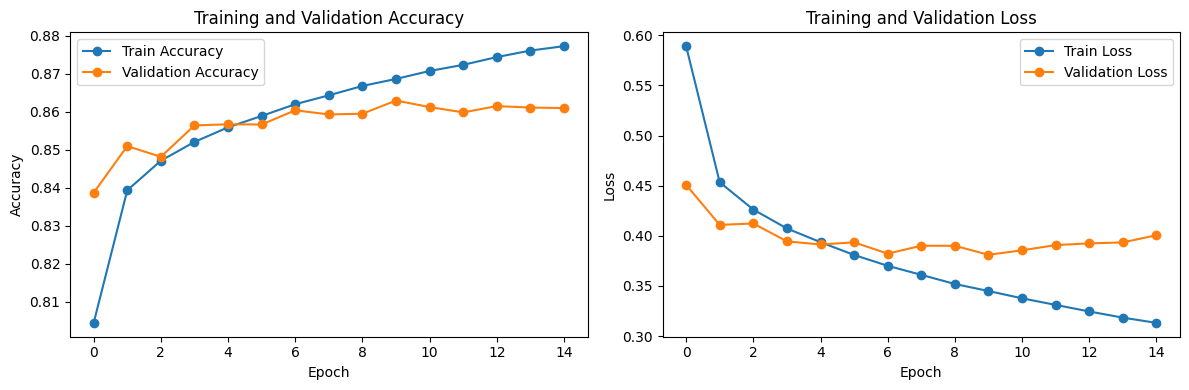

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def predict_and_display(sample_index):
    image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Predict the label
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Display the image and predicted label
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {emnist_labels[predicted_label]}, Actual: {emnist_labels[true_label]}')
    plt.axis('off')
    plt.show()

    print(f'Predicted Label: {emnist_labels[predicted_label]}, Actual Label: {emnist_labels[true_label]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


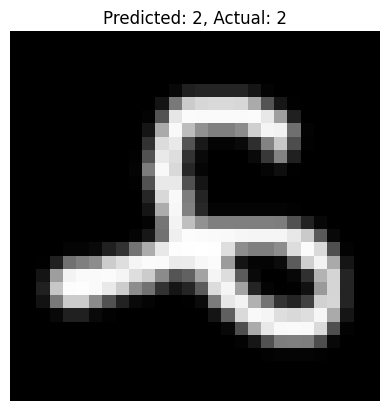

Predicted Label: 2, Actual Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


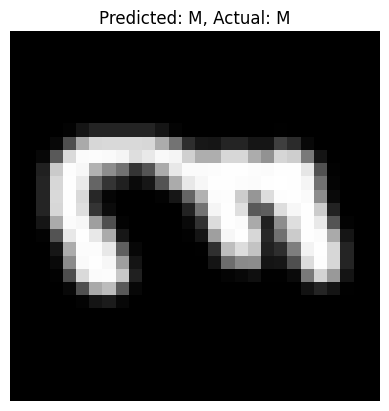

Predicted Label: M, Actual Label: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


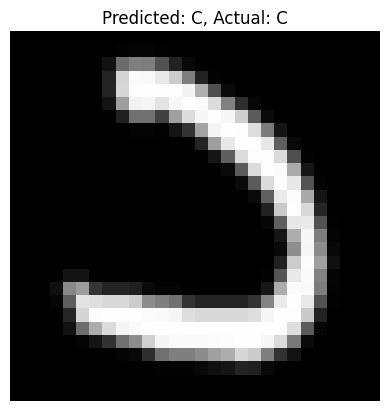

Predicted Label: C, Actual Label: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


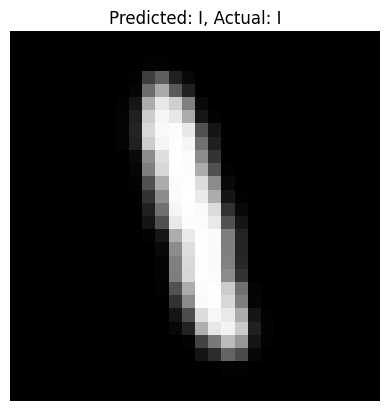

Predicted Label: I, Actual Label: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


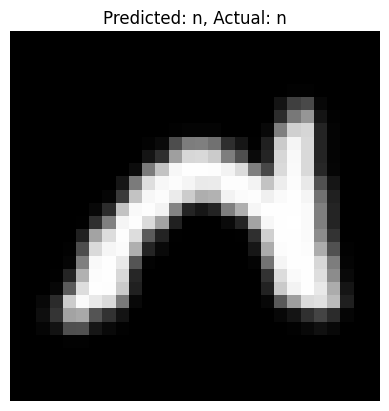

Predicted Label: n, Actual Label: n


In [ ]:
# Test with sample images
sample_indices = [10, 200, 600, 1200, 3200]
for idx in sample_indices:
    predict_and_display(idx)